#### **Libraries :**

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### **Dataset :**

In [67]:
# The dataset was directly retrieved from Kaggle.
import kagglehub

# Download latest version
path = kagglehub.dataset_download("samybaladram/palmers-penguin-dataset-extended")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/palmers-penguin-dataset-extended


In [68]:
# Let's check and see which documents there are and what kinds they consist of.
import os

dp_0 = os.listdir(path)
print("Dataset files:", dp_0)

Dataset files: ['palmerpenguins_original.csv', 'palmerpenguins_extended.csv']


In [69]:
# We load the dataset as a pandas DataFrame to enable data manipulation and analysis.

dp = pd.read_csv("/kaggle/input/palmers-penguin-dataset-extended/palmerpenguins_original.csv")

**FEATURE EXPLANATION:**      
**Species:** The species of the penguin. (Adelie, Chinstrap, Gentoo)

**Island:** The island where the penguin was found/observed. (Biscoe, Dream, Torgensen)

**Sex:** The gender of the penguin. (Male, Female)

**Diet:** The penguin’s primary diet. (Fish, Krill, Squid)

**Year:** The years in which the data was collected. (2021–2025)

**Life Stage:** The life stage of the penguin. (Chick, Juvenile, Adult)

**Body Mass (g):** Body mass in grams.

**Bill Length (mm):** Bill length in millimeters.

**Bill Depth (mm):*** Bill depth in millimeters.

**Flipper Length (mm):** Flipper length in millimeters.

**Health Metrics:** The health status of the penguin. (Healthy, Overweight, Underweight)






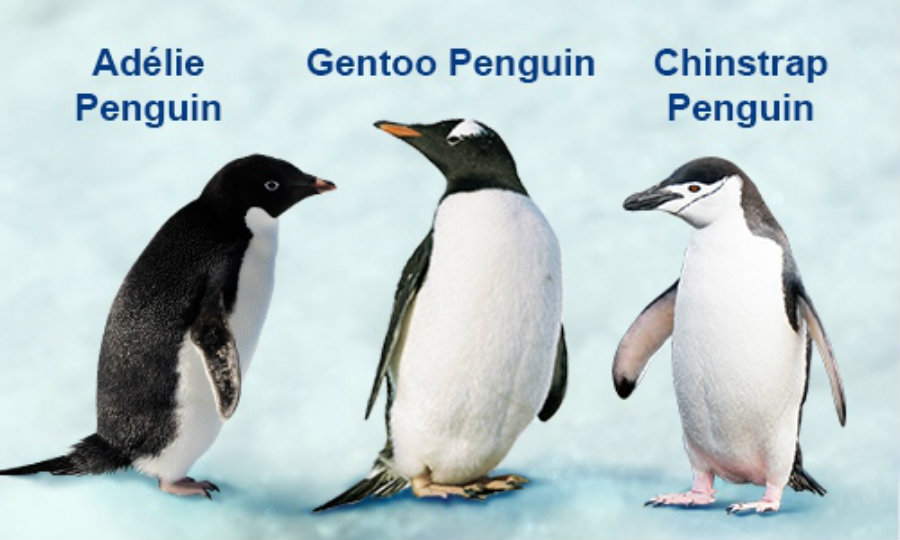



####**Initial Data Inspection:**

In [70]:
dp.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [71]:
# Would like to see which species inhabit which islands.

In [72]:
adelie = dp[dp["species"] == 'Adelie'].groupby(["island"]).head()
print(adelie.island.unique())

['Torgersen' 'Biscoe' 'Dream']


In [73]:
chinstrap = dp[dp["species"] == 'Chinstrap'].groupby(["island"]).head()
print(chinstrap.island.unique())

['Dream']


In [74]:
gentoo = dp[dp["species"] == 'Gentoo'].groupby(["island"]).head()
print(gentoo.island.unique())

['Biscoe']


In [75]:
dp.index

RangeIndex(start=0, stop=344, step=1)

In [76]:
# Let's check the data type if they are appropriate for their intended use.
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [77]:
dp.describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
bill_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0
year,344.0,2008.029070,0.818356,2007.0,2007.000,2008.00,2009.0,2009.0


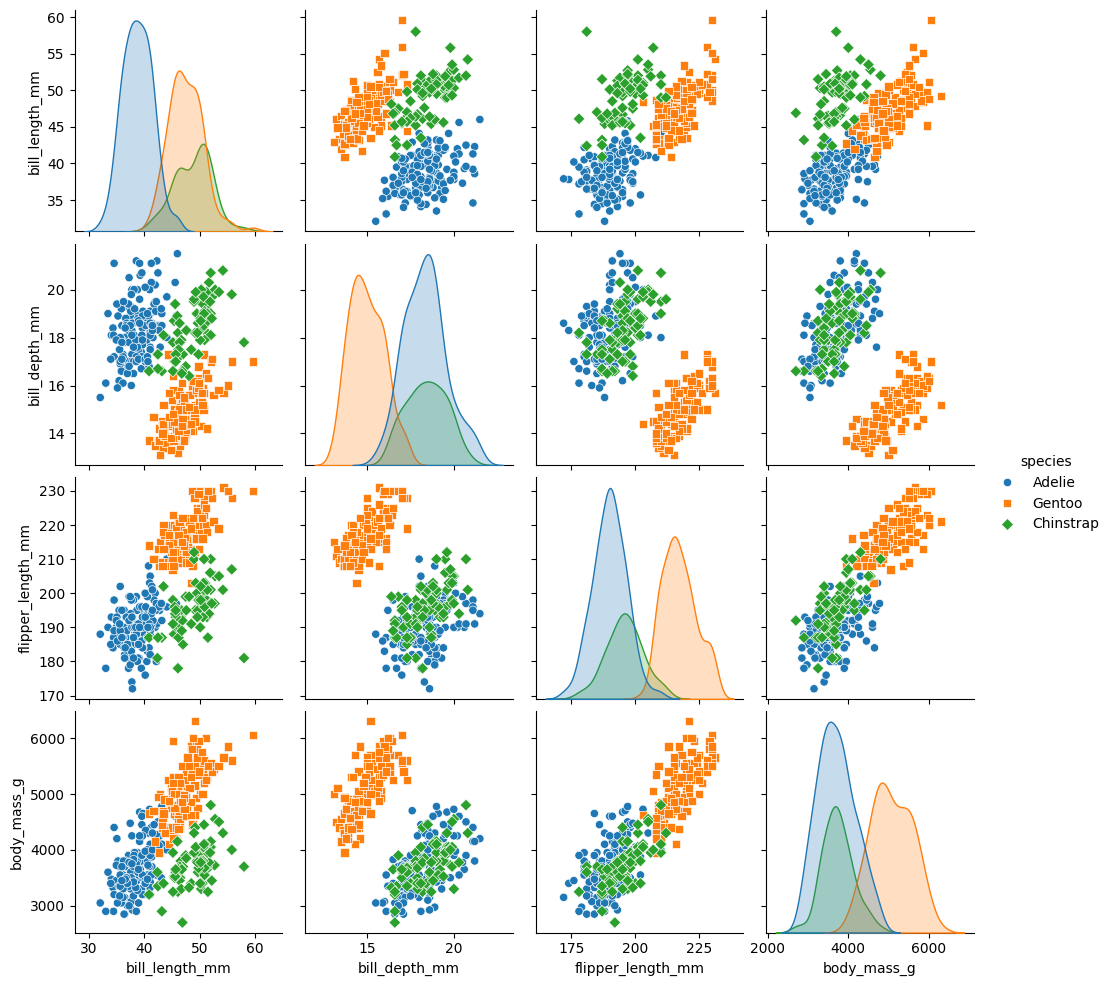

In [78]:
df_numer = dp.drop("year", axis= 1)
sns.pairplot(df_numer, hue="species", markers=["o", "s", "D"])
plt.show()

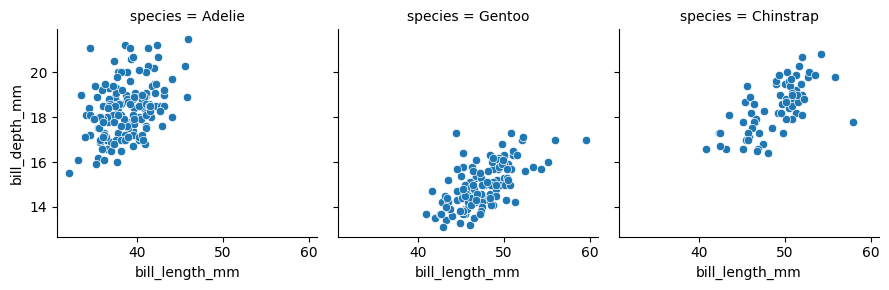

In [80]:
# Let's take a closer look at the plots above, separating them by species to better observe the differences.

face_grid = sns.FacetGrid(dp, col="species")
face_grid.map(sns.scatterplot, "bill_length_mm", "bill_depth_mm")
plt.show()

**Adelie:** bill_length is observed between 32 mm - 45 mm and, bill_depth is observed between 16 mm - 20 mm .  
**Gentoo:** bill_length is observed between 40 mm - 60 mm and, bill_depth is observed between 13 mm - 18 mm.     
**Chinstrap:** bill_length is observed between 40 mm - 60 mm and , bill_depth is observed between 16 mm - 21 mm.

#### **NULL Değer Analizi :**

In [81]:
# The null values:
dp.isnull().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11
year,0


In [82]:
# NULL percentage list:
null_percentage = round(dp.isnull().iloc[:,2:7].sum()/len(dp.iloc[:,2:6]),4)
null_percentage = pd.DataFrame(null_percentage)
null_percentage.columns = ["null_Percentage"]
null_percentage

,null_Percentage
bill_length_mm,0.0058
bill_depth_mm,0.0058
flipper_length_mm,0.0058
body_mass_g,0.0058
sex,0.0320


In [83]:
# In general, if the percentage of missing values is less than 1%, it is acceptable to drop them.
dp.dropna(inplace = True)

dp.isnull().sum()

,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0
year,0


#### **A . Outlier Analysis**

##### **A.1. Outlier Visualization :**

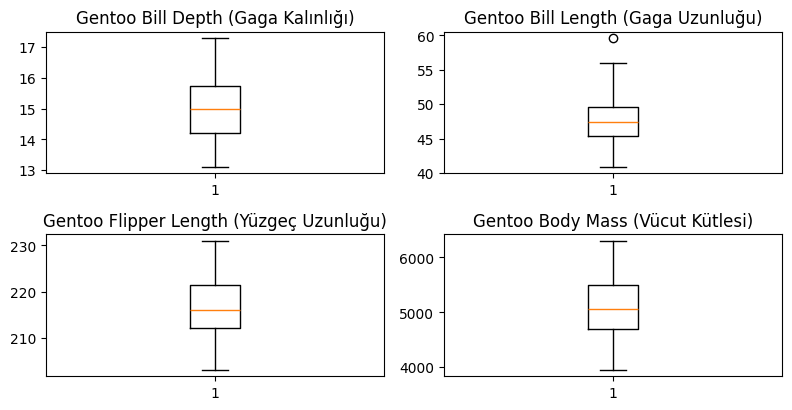

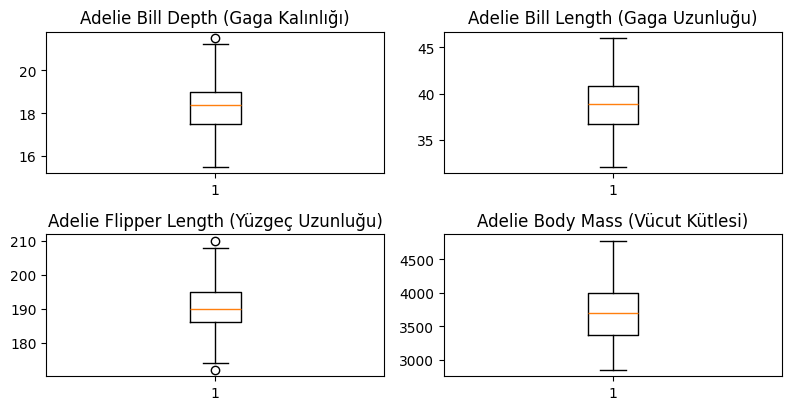

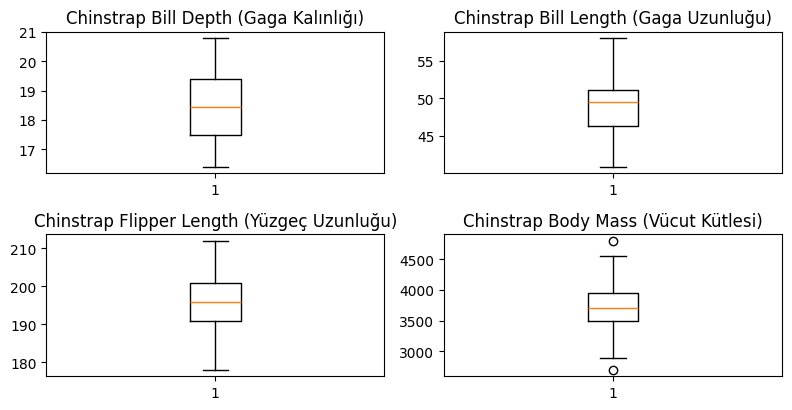

In [84]:
# Hence, since the purpose of the research is biological and aims to differentiate the three penguin species, I prefer to analyze outliers for each species separately.
# This contributes to a more accurate understanding and identification of the different species.

fig = plt.figure(figsize = (12,6))
gs = fig.add_gridspec(3, 3)

ax1 = fig.add_subplot(gs[0,0])
ax1.boxplot(dp[dp["species"] == 'Gentoo']["bill_depth_mm"])
ax1.set_title("Gentoo Bill Depth (Gaga Kalınlığı)")

ax2 = fig.add_subplot(gs[0,1])
ax2.boxplot(dp[dp["species"] == 'Gentoo']["bill_length_mm"])
ax2.set_title("Gentoo Bill Length (Gaga Uzunluğu)")

ax3 = fig.add_subplot(gs[1,0])
ax3.boxplot(dp[dp["species"] == 'Gentoo']["flipper_length_mm"])
ax3.set_title("Gentoo Flipper Length (Yüzgeç Uzunluğu)")

ax4 = fig.add_subplot(gs[1,1])
ax4.boxplot(dp[dp["species"] == 'Gentoo']["body_mass_g"])
ax4.set_title("Gentoo Body Mass (Vücut Kütlesi)")

plt.tight_layout()
plt.show()


fig = plt.figure(figsize = (12,6))
gs = fig.add_gridspec(3, 3)

ax1 = fig.add_subplot(gs[0,0])
ax1.boxplot(dp[dp["species"] == 'Adelie']["bill_depth_mm"])
ax1.set_title("Adelie Bill Depth (Gaga Kalınlığı)")

ax2 = fig.add_subplot(gs[0,1])
ax2.boxplot(dp[dp["species"] == 'Adelie']["bill_length_mm"])
ax2.set_title("Adelie Bill Length (Gaga Uzunluğu)")

ax3 = fig.add_subplot(gs[1,0])
ax3.boxplot(dp[dp["species"] == 'Adelie']["flipper_length_mm"])
ax3.set_title("Adelie Flipper Length (Yüzgeç Uzunluğu)")

ax4 = fig.add_subplot(gs[1,1])
ax4.boxplot(dp[dp["species"] == 'Adelie']["body_mass_g"])
ax4.set_title("Adelie Body Mass (Vücut Kütlesi)")

plt.tight_layout()
plt.show()


fig = plt.figure(figsize = (12,6))
gs = fig.add_gridspec(3, 3)

ax1 = fig.add_subplot(gs[0,0])
ax1.boxplot(dp[dp["species"] == 'Chinstrap']["bill_depth_mm"])
ax1.set_title("Chinstrap Bill Depth (Gaga Kalınlığı)")

ax2 = fig.add_subplot(gs[0,1])
ax2.boxplot(dp[dp["species"] == 'Chinstrap']["bill_length_mm"])
ax2.set_title("Chinstrap Bill Length (Gaga Uzunluğu)")

ax3 = fig.add_subplot(gs[1,0])
ax3.boxplot(dp[dp["species"] == 'Chinstrap']["flipper_length_mm"])
ax3.set_title("Chinstrap Flipper Length (Yüzgeç Uzunluğu)")

ax4 = fig.add_subplot(gs[1,1])
ax4.boxplot(dp[dp["species"] == 'Chinstrap']["body_mass_g"])
ax4.set_title("Chinstrap Body Mass (Vücut Kütlesi)")

plt.tight_layout()
plt.show()



In [85]:
"""
This function aims to perform a detailed outlier analysis using the IQR technique.
It detects outliers and calculates their upper and lower bounds.
"""
def outlier_analyze(species : str, feature : str):

  Q1 = dp[dp["species"] == species][feature].quantile(0.25)
  Q3 = dp[dp["species"] == species][feature].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = round(Q1 - 1.5*IQR,3)
  upper_bound = round(Q3 + 1.5*IQR,3)

  dp_lower = dp[(dp["species"] == species) & (dp[feature] <= lower_bound)]
  dp_upper = dp[(dp["species"] == species) & (dp[feature] >= upper_bound)]

  print(f"{species} {feature}..: is between {lower_bound} ile {upper_bound} values. ")

  print(f"lower bound outliers count..: {dp_lower.shape[0]}")
  print(f"upper bound outliers count..: {dp_upper.shape[0]}")
  print('')



"""
This function aims to drop outliers based on the IQR technique.
It detects the lower and upper bounds, identifies outliers,
and removes them from the dataset if any are found.
"""

def clear_outliers(species : str, feature : str):

  Q1 = dp[dp["species"] == species][feature].quantile(0.25)
  Q3 = dp[dp["species"] == species][feature].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = round(Q1 - 1.5*IQR,3)
  upper_bound = round(Q3 + 1.5*IQR,3)

  dp_lower = dp[(dp["species"] == species) & (dp[feature] <= lower_bound)]
  dp_upper = dp[(dp["species"] == species) & (dp[feature] >= upper_bound)]

  if not dp_lower.empty:
    dp.drop(dp_lower.index, inplace=True)

  if not dp_upper.empty:
    dp.drop(dp_upper.index, inplace=True)

    print("")


##### **A.2.a. Adelie Uç Değer**

In [86]:
outlier_analyze('Adelie', 'bill_depth_mm')
outlier_analyze('Adelie', 'bill_length_mm')
outlier_analyze('Adelie', 'flipper_length_mm')
outlier_analyze('Adelie', 'body_mass_g')

Adelie bill_depth_mm..: is between 15.25 ile 21.25 values. 
lower bound outliers count..: 0
upper bound outliers count..: 1

Adelie bill_length_mm..: is between 30.65 ile 46.85 values. 
lower bound outliers count..: 0
upper bound outliers count..: 0

Adelie flipper_length_mm..: is between 172.5 ile 208.5 values. 
lower bound outliers count..: 1
upper bound outliers count..: 1

Adelie body_mass_g..: is between 2406.25 ile 4956.25 values. 
lower bound outliers count..: 0
upper bound outliers count..: 0



In [87]:
clear_outliers('Adelie', 'bill_depth_mm')
clear_outliers('Adelie', 'flipper_length_mm')

In [88]:
outlier_analyze('Adelie', 'bill_depth_mm')
outlier_analyze('Adelie', 'flipper_length_mm')

Adelie bill_depth_mm..: is between 15.25 ile 21.25 values. 
lower bound outliers count..: 0
upper bound outliers count..: 0

Adelie flipper_length_mm..: is between 172.5 ile 208.5 values. 
lower bound outliers count..: 0
upper bound outliers count..: 0



##### **A.2.b. Gentoo Uç Değer :**

In [89]:
outlier_analyze('Gentoo', 'bill_depth_mm')
outlier_analyze('Gentoo', 'bill_length_mm')
outlier_analyze('Gentoo', 'flipper_length_mm')
outlier_analyze('Gentoo', 'body_mass_g')

Gentoo bill_depth_mm..: is between 11.875 ile 18.075 values. 
lower bound outliers count..: 0
upper bound outliers count..: 0

Gentoo bill_length_mm..: is between 38.975 ile 55.975 values. 
lower bound outliers count..: 0
upper bound outliers count..: 1

Gentoo flipper_length_mm..: is between 197.75 ile 235.75 values. 
lower bound outliers count..: 0
upper bound outliers count..: 0

Gentoo body_mass_g..: is between 3500.0 ile 6700.0 values. 
lower bound outliers count..: 0
upper bound outliers count..: 0



In [90]:
clear_outliers('Gentoo', 'bill_length_mm')

In [91]:
outlier_analyze('Gentoo', 'bill_length_mm')

Gentoo bill_length_mm..: is between 38.95 ile 55.95 values. 
lower bound outliers count..: 0
upper bound outliers count..: 0



##### **A.2.c. Chinstrap Uç Değer :**

In [92]:
outlier_analyze('Chinstrap', 'bill_depth_mm')
outlier_analyze('Chinstrap', 'bill_length_mm')
outlier_analyze('Chinstrap', 'flipper_length_mm')
outlier_analyze('Chinstrap', 'body_mass_g')

Chinstrap bill_depth_mm..: is between 14.65 ile 22.25 values. 
lower bound outliers count..: 0
upper bound outliers count..: 0

Chinstrap bill_length_mm..: is between 39.262 ile 58.163 values. 
lower bound outliers count..: 0
upper bound outliers count..: 0

Chinstrap flipper_length_mm..: is between 176.0 ile 216.0 values. 
lower bound outliers count..: 0
upper bound outliers count..: 0

Chinstrap body_mass_g..: is between 2793.75 ile 4643.75 values. 
lower bound outliers count..: 1
upper bound outliers count..: 1



In [93]:
clear_outliers('Chinstrap', 'body_mass_g')

In [94]:
outlier_analyze('Chinstrap', 'body_mass_g')

Chinstrap body_mass_g..: is between 2825.0 ile 4625.0 values. 
lower bound outliers count..: 0
upper bound outliers count..: 0



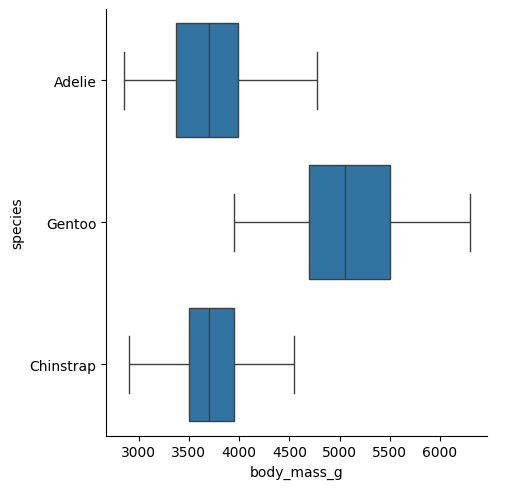

In [96]:
sns.catplot(data=dp, x="body_mass_g", y="species", kind="box")
plt.show()

– The body mass of Chinstrap and Adelie penguins is similar to each other, as indicated by the median values. The Gentoo penguin, however, has a noticeably higher body mass than the others.
– Gentoo’s body mass is distributed across a wide range, approximately between 4500g and 5500g.